In [1]:
import sys
sys.path.append('/eos/home-i00/l/lkoller/data-analysis-software/')
sys.path.append('/eos/home-i00/l/lkoller/SWAN_projects/commands')
sys.path.append('/eos/home-i00/l/lkoller/SWAN_projects/commands/Lya_commands')

from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Ldate_commands import Ldate
from Lfile_commands import Lfile


In [34]:
date = Ldate('23_12_06')
#res1 = date.get_events_from_day()
#evs = Ldayevs(res1[0],res1[1],res1[2])
fp = date.get_filepaths()

In [47]:
def rmse(fp):
    file = Lfile(fp)

    data = file.read_trc()
    time = data[0][0]
    vol = [data[1][0], data[1][1], data[1][2], data[1][3]]
    bg = [0,0,0,0]
    rmse = [0,0,0,0]

    for k in range(4):
        bg[k] += sum(vol[k][1000:2000])/(1000)

    for k in range(4):
        #plt.figure(figsize = (20,5))
        #ax = plt.gca()
        #ax.set_ylim([-0.004,0.004])
        #plt.scatter(time[1000:1500], vol[k][1000:1500], color = 'red')
        rmse[k] = (1/1000 * sum([(val - bg[k]) ** 2 for val in vol[k][1000:2000]])) ** 0.5
        
    return rmse
    

In [43]:
micro = [0,0]
for i in range(int(len(fp)/2)):
    t = rmse(fp[i])
    if (t[0] < 0.0005): 
        micro[0] += 1
    else: 
        micro[1] += 1

print(micro)
print(len(fp))

[874, 816]
3380


In [53]:
for i in range(20):
    t = rmse(fp[i + 1480])
    print(t)
    print()

[0.0004325516506933623, 0.0004085752892843384, 0.0002617814190645929, 0.00035260599777731815]

[0.0004130278425721396, 0.00042495492863580867, 0.0002614968873462511, 0.00035446656914554466]

[0.0004118775393072108, 0.0004179059016134931, 0.0003210293184378312, 0.00035994552509079953]

[0.00037822499840823307, 0.00040987368351869043, 0.00021186081633116968, 0.0003321877949617339]

[0.0003921818733692402, 0.00040921386901313545, 0.0002887763359429702, 0.0003271096489308805]

[0.0003951932933015041, 0.00042604176164262017, 0.0002868615469437024, 0.0003502835151461228]

[0.00038686884073958614, 0.00043616108746545725, 0.0002957209729745709, 0.0003875282801661475]

[0.0003779710953526808, 0.00040924862261349014, 0.000255082017604244, 0.00036781685708979023]

[0.00038285469062086965, 0.0004261038273588233, 0.00022547855003116892, 0.00036413475836097006]

[0.0003861058412213067, 0.00042890095996450726, 0.0002910208049517193, 0.00032196590981563143]

[0.0006290653783823083, 0.00101077351500852

[0.0003646183862707307, 0.00046150586609041886, 0.00029163561522489874, 0.0003842804896813417]


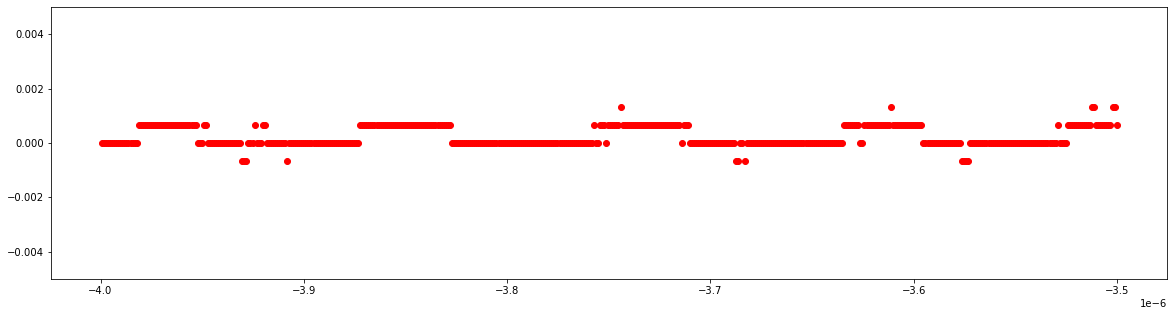

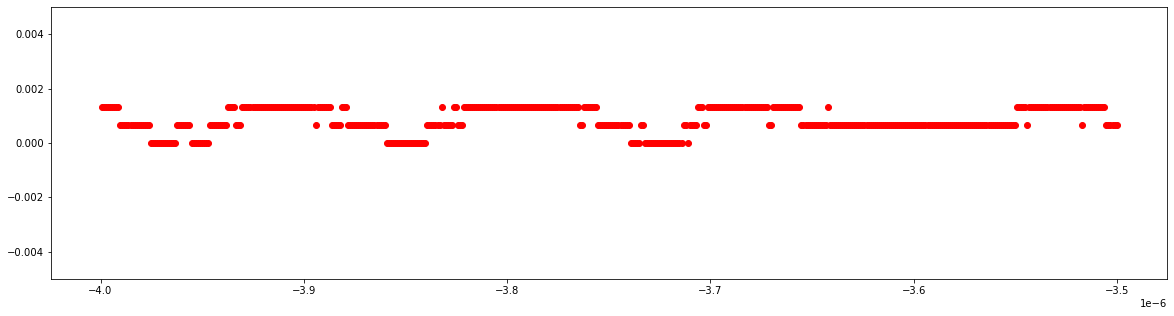

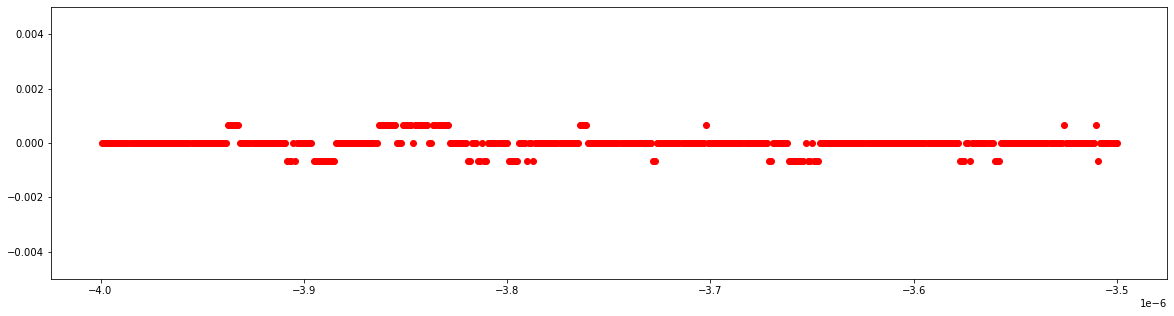

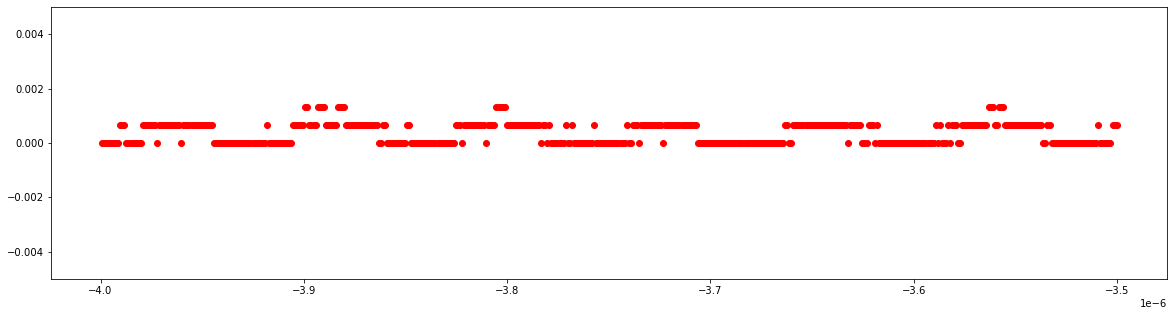

In [45]:
i = 20

file = Lfile(fp[i])

data = file.read_trc()
time = data[0][0]
vol = [data[1][0], data[1][1], data[1][2], data[1][3]]
bg = [0,0,0,0]
rmse = [0,0,0,0]

for k in range(4):
    bg[k] += sum(vol[k][1000:2000])/(1000)

for k in range(4):
    plt.figure(figsize = (20,5))
    ax = plt.gca()
    ax.set_ylim([-0.005,0.005])
    plt.scatter(time[1000:1500], vol[k][1000:1500], color = 'red')
    rmse[k] = (1/500 * sum([(val - bg[k]) ** 2 for val in vol[k][1000:1500]])) ** 0.5
    
print(rmse)

In [7]:
bg = [0, 0, 0, 0]

for i in range(int(len(fp)/2)):
    file = Lfile(fp[i])

    data = file.read_trc()
    time = data[0][0]
    vol = [data[1][0], data[1][1], data[1][2], data[1][3]]

    for k in range(4):
        bg[k] += sum(vol[k][1000:2000])/(1000*len(fp)/2)
        
for i in range(4):
    print('mean of background for channel ' + str(i+1) + ': ' + str(bg[i]))


mean of background for channel 1: 0.0003204735343975764
mean of background for channel 2: 0.0007906325609571522
mean of background for channel 3: 3.123223459215147e-05
mean of background for channel 4: 0.0003824912167162706
